# Fast.AI Computational Linear Algebra

In [16]:
# Imports
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline
np.set_printoptions(suppress=True)

## Topic Modeling with NMF and SVD    

## Lesson 2

In [18]:
# Get Newsgroups data from sklearn
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics','sci.space']
remove = ['headers','footers','quotes']
newsgroups_train = fetch_20newsgroups(subset='train', 
                                     categories=categories,
                                     remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     categories=categories,
                                     remove=remove)

In [19]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [20]:
newsgroups_train.keys()

dict_keys(['filenames', 'data', 'target_names', 'target', 'DESCR', 'description'])

In [21]:
# First 3 items in data
print('\n'.join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [22]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'],
      dtype='<U18')

In [23]:
newsgroups_train.target[:10]

array([1, 3, 2, 0, 2, 0, 2, 1, 2, 1], dtype=int64)

In [24]:
num_topics, num_top_words = 6,8

In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
# Count non-stop words using a dense matrix (to make it easier for this exercise)
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [27]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [28]:
vocab = np.array(vectorizer.get_feature_names())

In [29]:
vocab.shape

(26576,)

In [30]:
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar', 'costing', 'costly',
       'costruction', 'costs', 'cosy', 'cote', 'couched', 'couldn', 'council', 'councils',
       'counsel', 'counselees', 'counselor', 'count'],
      dtype='<U80')

### Singular Value Decomposition (SVD)

In [121]:
# Orthomormal -> Dot product with itself is 1, dot product with other vectors is 0
# Orthogonal matrix -> Columns and rows are orthonormal
# A = U∑V^T -> U orthogonal, ∑ relative importance (singular values), V^T rows are orthonormal
# Want to capture very different features
# Exact decomposition of original matrix
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 13.8 s


In [32]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


#### Check if U,s,Vh is SVD of vectors

In [33]:
# Take a vector and make square matrix using diag
# Norm to get to one number
reconstructed_vectors = U @ np.diag(s) @ Vh
# np.linalg.norm(reconstructed_vectors - vectors)
np.allclose(reconstructed_vectors, vectors)

True

#### Confirm U and Vh are orthonormal

In [34]:
# Multiply by the transpose and compare to identity
np.allclose(U.T @ U, np.eye(U.shape[0]))
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

#### Singular values (importance)

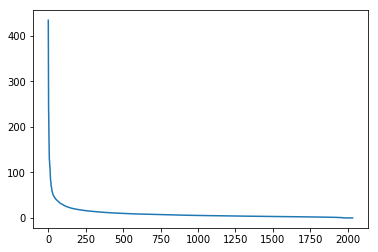

In [35]:
plt.plot(s);

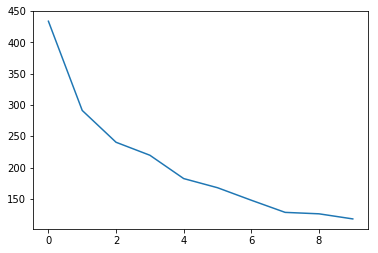

In [36]:
plt.plot(s[:10]);

#### Find largest word values for topics

In [37]:
num_top_words = 8
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [38]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

### Non-negative Matrix Factorization (NMF)

In [39]:
# Instead of orthogonal use non-negative matrix factors of features and importance
# Non-exact 
m,n = vectors.shape
d = 5

In [40]:
clf = decomposition.NMF(n_components=d, random_state=1)

In [41]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [42]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

#### TFIDF

In [43]:
# TF = (# occurrences of term t in document) / (# of words in documents)
# IDF = log(# of documents / # documents with term t in it)
# Advantage is it is Fast
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data)

In [44]:
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_

In [45]:
show_topics(H1)

['people don think just like objective say morality',
 'graphics thanks files image file program windows know',
 'space nasa launch shuttle orbit moon lunar earth',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'god jesus bible believe christian atheism does belief']

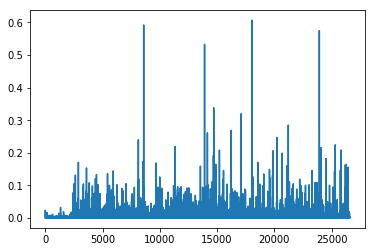

In [46]:
plt.plot(clf.components_[0]);

In [47]:
clf.reconstruction_err_

43.7129

### NMF using SGD

#### Gradient Descent Intro

In [48]:
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
# rcParams['figure.figsize'] = 3,3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [49]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [50]:
def lin(a,b,x): return a*x+b

In [51]:
a=3; b=8

In [52]:
n=30; x = random(n) ; y = lin(a,b,x)

In [53]:
x

array([ 0.0017,  0.5789,  0.4383,  0.0834,  0.6148,  0.7272,  0.5092,  0.1849,  0.5595,  0.5037,
        0.7754,  0.2605,  0.1207,  0.0962,  0.7108,  0.9192,  0.047 ,  0.8458,  0.6884,  0.3577,
        0.5537,  0.589 ,  0.9998,  0.785 ,  0.0396,  0.9424,  0.9271,  0.2319,  0.0165,  0.1613])

In [54]:
y

array([  8.0051,   9.7368,   9.3148,   8.2502,   9.8444,  10.1816,   9.5275,   8.5548,   9.6785,
         9.5111,  10.3261,   8.7814,   8.3622,   8.2885,  10.1324,  10.7577,   8.141 ,  10.5373,
        10.0652,   9.073 ,   9.661 ,   9.7669,  10.9994,  10.3551,   8.1187,  10.8272,  10.7812,
         8.6956,   8.0495,   8.4839])

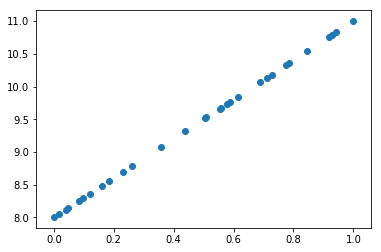

In [55]:
plt.scatter(x,y);

In [56]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y,lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [57]:
a_guess = -1; b_guess = 1; avg_loss(y,a_guess,b_guess,x)

8.9913

In [58]:
lr = 0.05

In [59]:
def upd():
    global a_guess, b_guess
    # Make prediction using current weights
    y_pred = lin(a_guess, b_guess, x)
    # Calculate the change of the loss
    dydb = 2*(y_pred - y)
    dyda = x*dydb
    # Update the weights in the direction of steepest change
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [60]:
# If you do not see ffmpeg in this list run 'conda install -c conda-forge ffmpeg' in terminal
# And restart kernel if needed
print(animation.writers.list())

['ffmpeg', 'ffmpeg_file', 'html']


In [61]:
fig = plt.figure(dpi=100, figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x, lin(a_guess, b_guess, x))
plt.close()
def animate(i):
    line.set_ydata(lin(a_guess, b_guess, x))
    for i in range(10): upd()
    return line
ani = animation.FuncAnimation(fig, animate, np.arange(0,40), interval=100)
ani

#### SGD

In [62]:
# Take loss on minibatch of data rather than all data
# Minimize frobenius norm of V - WH for NMF
# V (m x n) => W (m x d) H (d x n)  d << m,n
lam = 1e3
lr = 1e-2
m,n = vectors_tfidf.shape

In [63]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [64]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [65]:
mu = 1e-6
def grads(M,W,H):
    R = W @ H-M
    return R @ H.T + penalty(W, mu)*lam, W.T @ R + penalty(H, mu)*lam

In [66]:
# Want non-negative numbers so penalize if number less than or close to 0
def penalty(M, mu):
    return np.where(M>=mu,0,np.min(M-mu,0))

In [67]:
# SGD update
def upd(M,W,H,lr):
    dW,dH = grads(M,W,H)
    W -= lr*dW; H -= lr*dH

In [68]:
# Print out norm, min, and count of negative numbers in W and H
def report(M,W,H):
    print(np.linalg.norm(M-W @ H), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [69]:
# Initialize W and H to random normal
W = np.abs(np.random.normal(scale=0.01, size=(m,d)))
H = np.abs(np.random.normal(scale=0.01, size=(d,n)))

In [70]:
report(vectors_tfidf, W, H)

44.4250897378 9.04027651612e-07 2.0283021991e-07 0 0


In [71]:
upd(vectors_tfidf, W, H, lr)

In [72]:
report(vectors_tfidf, W, H)

44.4172754146 -0.000868131596573 -7.20859496432e-05 132 300


In [73]:
for i in range(50):
    upd(vectors_tfidf, W, H, lr)
    if i % 10 == 0: report(vectors_tfidf, W, H)

44.4114804382 -0.00080971229479 -6.36370278342e-05 128 274
44.373463549 -0.000448737676938 -4.90287773821e-05 42 497
44.344468312 -0.000143338398341 -7.21892049572e-05 34 984
44.3123358911 -0.000147257988437 -9.07093635061e-05 32 1513
44.2772326898 -0.00015056893157 -0.000130493517453 33 2257


In [74]:
show_topics(H)

['god don space people like just think know',
 'space people don just god know like think',
 'god space just don like people think know',
 'god don does space people think just like',
 'space people like god think don just know']

#### PyTorch

In [75]:
# Tensor and Neural Network framework with GPU acceleration
import torch
import torch.cuda as tc
from torch.autograd import Variable

In [76]:
# requires_grad enables taking derivative of function
def V(M): return Variable(M, requires_grad=True)

In [77]:
v = vectors_tfidf.todense()

In [78]:
# Need to declare type for tensor 
t_vectors = torch.Tensor(v.astype(np.float32)).cuda()

In [79]:
mu = 1e-5

In [80]:
# mm -> Matrix multiply
def grads_t(M,W,H):
    R = W.mm(H)-M
    return (R.mm(H.t()) + penalty_t(W,mu)*lam,
            W.t().mm(R) + penalty_t(H,mu)*lam)

def penalty_t(M,mu):
    return (M<mu).type(tc.FloatTensor)*torch.clamp(M-mu, max=0.)

def upd_t(M,W,H,lr):
    dW,dH = grads_t(M,W,H)
    W.sub_(lr*dW); H.sub_(lr*dH)

def report_t(M,W,H):
    print((M-W.mm(H)).norm(2), W.min(), H.min(), (W<0).sum(), (H<0).sum())

In [81]:
# Declare float tensor
t_W = tc.FloatTensor(m,d)
t_H = tc.FloatTensor(d,n)
t_W.normal_(std=0.01).abs_()
t_H.normal_(std=0.01).abs_()


 9.5713e-03  8.4992e-03  1.0574e-02  ...   1.1156e-02  4.3517e-04  1.1239e-02
 1.2632e-02  1.7841e-02  1.2826e-02  ...   1.1884e-02  9.8711e-04  1.0657e-02
 5.3668e-03  1.5089e-02  5.0358e-03  ...   2.0782e-02  4.1053e-03  1.1267e-02
 5.2696e-03  8.3848e-03  5.9839e-04  ...   4.7377e-03  1.1898e-02  6.0022e-03
 5.1287e-03  1.2928e-02  5.1505e-03  ...   9.1989e-03  2.2584e-03  7.8100e-03
[torch.cuda.FloatTensor of size 5x26576 (GPU 0)]

In [82]:
d=6; lam=100; lr=0.05

In [83]:
# Much faster
for i in range(1000):
    upd_t(t_vectors, t_W, t_H, lr)
    if i % 100 == 0:
        report_t(t_vectors, t_W, t_H)
        lr *= 0.9  # Learning rate annealing as you get closer to convergence

44.39395523071289 -0.004677398595958948 -0.0005056614754721522 802 1417
43.767066955566406 -0.01113872230052948 -0.0106318024918437 1511 17737
43.75174331665039 -0.008106151595711708 -0.010179281234741211 1679 18949
43.746421813964844 -0.00828084908425808 -0.011464903131127357 1786 19592
43.73964309692383 -0.009596556425094604 -0.007980871014297009 2024 19260
43.729209899902344 -0.007047372870147228 -0.005468767136335373 2460 19411
43.72320556640625 -0.0042953165248036385 -0.004565082490444183 2424 17996
43.722293853759766 -0.003415839048102498 -0.006910840980708599 2112 19089
43.722129821777344 -0.00465413136407733 -0.007211850490421057 2015 19302
43.72193145751953 -0.004218253772705793 -0.005811680573970079 2266 22520


In [84]:
show_topics(t_H.cpu().numpy())

['god people jesus don bible just say believe',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'graphics thanks files image file program know windows',
 'objective morality moral values think subjective people science',
 'space nasa launch shuttle moon orbit lunar earth']

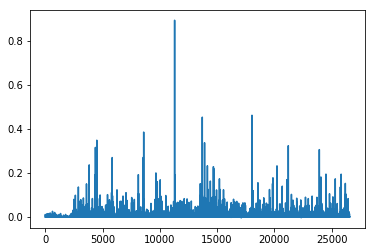

In [85]:
plt.plot(t_H.cpu().numpy()[0]);

In [86]:
t_W.mm(t_H).max()

0.3580

In [87]:
t_vectors.max()

1.0000

#### Pytorch Autograd

In [103]:
# Instead of calculating gradients by hand pytorch computes automatically
x = Variable(torch.ones(2,2), requires_grad=True); print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [104]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [106]:
# pytorch lazy loads gradient so does not compute unless actually useing backprop
print(x.grad)

None


In [107]:
y = x + 2; y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

In [108]:
z = y * y * 3
out = z.sum(); (z, out)

(Variable containing:
  27  27
  27  27
 [torch.FloatTensor of size 2x2], Variable containing:
  108
 [torch.FloatTensor of size 1])

In [109]:
# Now x.grad populated
out.backward(); x.grad

Variable containing:
 18  18
 18  18
[torch.FloatTensor of size 2x2]

#### Autograd and NMF

In [110]:
lam = 1e6

In [112]:
pW = Variable(tc.FloatTensor(m,d), requires_grad=True)
pH = Variable(tc.FloatTensor(d,n), requires_grad=True)
pW.data.normal_(std=0.01).abs_()
pH.data.normal_(std=0.01).abs_()


 2.9598e-04  8.5393e-03  1.6649e-02  ...   1.2663e-02  1.5434e-03  8.6773e-03
 3.0736e-03  6.6233e-03  6.6503e-03  ...   8.0250e-03  9.2719e-03  1.3552e-02
 7.3933e-03  8.8740e-06  1.4338e-03  ...   2.7446e-04  1.3619e-02  2.3602e-03
 1.1303e-02  5.1680e-03  9.2259e-03  ...   2.8507e-03  5.9584e-04  8.8146e-03
 2.7064e-03  1.3218e-03  1.0073e-02  ...   2.3849e-03  7.0625e-03  1.3083e-03
 7.5394e-04  1.6737e-02  1.0753e-03  ...   1.3983e-02  5.3402e-03  8.9210e-03
[torch.cuda.FloatTensor of size 6x26576 (GPU 0)]

In [113]:
def report():
    W,H = pW.data, pH.data
    print((M-pW.mm(pH)).norm(2).data[0], W.min(), H.min(), (W<0).sum(), (H<0).sum())
    
def penalty(A):
    return torch.pow((A<0).type(tc.FloatTensor)*torch.clamp(A, max=0), 2) # penalize non-zero values

def penalize(): return penalty(pW).mean() + penalty(pH).mean()

def loss(): return (M-pW.mm(pH)).norm(2) + penalize()*lam

In [114]:
M = Variable(t_vectors).cuda()

In [115]:
opt = torch.optim.Adam([pW, pH], lr=1e-3, betas=(0.9,0.9))
lr = 0.05
report()

44.438961029052734 2.70426085080544e-07 2.726671937125502e-07 0 0


In [116]:
for i in range(1000):
    opt.zero_grad() # Clear gradients
    l = loss()  # NMF
    l.backward() # backprop gradients
    opt.step() # Perform optimization step
    if i % 100 == 99:
        report()
        lr *= 0.9

43.96426010131836 -0.0009789481991901994 -0.0010311532532796264 253 11964
43.79411315917969 -0.0006695807096548378 -0.0013703963486477733 236 14008
43.737125396728516 -0.0003677647328004241 -0.0012608981924131513 240 13443
43.70539093017578 -0.00032135829678736627 -0.0013043914223089814 243 13097
43.6846809387207 -0.00029364085639826953 -0.0008794669411145151 243 13072
43.6696891784668 -0.0002806742559187114 -0.000734308734536171 256 12694
43.65935516357422 -0.00028149489662609994 -0.0006711831083521247 237 12101
43.65489196777344 -0.00027146004140377045 -0.0005588411586359143 251 11072
43.65264892578125 -0.0002692656125873327 -0.0005654384731315076 298 10415
43.65132141113281 -0.00025799497961997986 -0.00047102008829824626 295 9323


In [119]:
h = pH.data.cpu().numpy()
show_topics(h)

['god jesus bible believe atheism christian does belief',
 'ico bobbe tek beauchaine bronx manhattan sank queens',
 'objective morality values moral subjective science absolute claim',
 'space nasa launch shuttle orbit lunar moon earth',
 'thanks graphics files image file program windows format',
 'don people think just like know say religion']

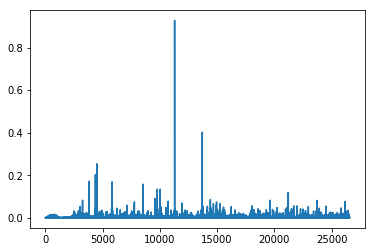

In [120]:
plt.plot(h[0])